In [69]:
import torch
import torchvision
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:

# Load the dataset
dataset = MNIST(root = "D:\Learning\ML\RL\TORCH\mnist_data", download= True )
# Access the first image and label
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: D:\Learning\ML\RL\TORCH\mnist_data
    Split: Train

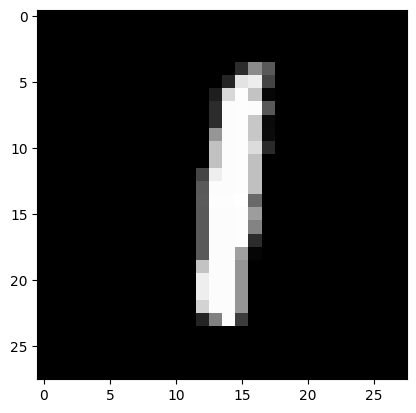

In [71]:
image, label = (dataset[1230])

# Print the type and shape of the image and label
plt.imshow(image, cmap= "gray")
plt.show()



In [72]:
test_dataset  = MNIST(root="D:\Learning\ML\RL\TORCH\mnist_data" , train=False)
len(test_dataset)

10000

In [73]:
import torchvision.transforms as transforms

In [74]:
dataset =  MNIST(root="D:\Learning\ML\RL\TORCH\mnist_data" , download=False , transform= transforms.ToTensor())
image_tensor , label  = dataset[0]
print(image_tensor.shape ,label)

torch.Size([1, 28, 28]) 5


In [75]:
from torch.utils.data import random_split
train_ds , val_ds = random_split(dataset , [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [76]:
from torch.utils.data import DataLoader
batch_size  = 128
train_loader = DataLoader(train_ds , batch_size , shuffle=True)
val_loader = DataLoader(val_ds , batch_size)

In [77]:
import torch.nn as nn
input_size = 28*28
num_classes = 10
model = nn.Linear(input_size , num_classes)


In [78]:
for images, label in train_loader:
    print(label)
    print()
    outputs = model(images.reshape(128,28*28))
    print(outputs[0])
    break

tensor([7, 1, 2, 3, 5, 8, 9, 8, 1, 7, 2, 0, 7, 2, 3, 1, 0, 6, 7, 0, 6, 3, 0, 3,
        4, 0, 3, 7, 8, 3, 8, 3, 8, 4, 6, 3, 9, 8, 0, 4, 4, 7, 7, 2, 3, 3, 0, 9,
        7, 8, 8, 7, 0, 5, 4, 5, 5, 4, 9, 6, 6, 9, 7, 5, 7, 2, 2, 0, 5, 7, 2, 1,
        0, 6, 5, 0, 3, 3, 4, 0, 3, 6, 6, 5, 2, 0, 3, 2, 6, 9, 6, 6, 7, 9, 0, 7,
        3, 1, 3, 7, 1, 3, 7, 0, 9, 9, 1, 9, 4, 7, 7, 0, 8, 2, 7, 1, 7, 9, 5, 3,
        1, 4, 8, 5, 4, 4, 1, 9])

tensor([-0.2117, -0.0930,  0.3150, -0.0158, -0.1103,  0.1911,  0.0708,  0.0377,
        -0.0420, -0.2160], grad_fn=<SelectBackward0>)


In [79]:
images.reshape(128 , 28*28).shape

torch.Size([128, 784])

In [80]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward (self , xb):
        xb = xb.reshape(-1, 784)
        out  = self.linear(xb)
        return out


model = MnistModel()

In [81]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0278, -0.0321,  0.0144,  ...,  0.0273,  0.0186, -0.0103],
         [-0.0234,  0.0022, -0.0259,  ...,  0.0339, -0.0323,  0.0084],
         [-0.0160, -0.0301,  0.0140,  ..., -0.0325,  0.0270,  0.0067],
         ...,
         [-0.0324,  0.0274, -0.0130,  ...,  0.0334,  0.0322, -0.0320],
         [ 0.0344, -0.0326,  0.0139,  ..., -0.0142, -0.0037,  0.0327],
         [ 0.0266, -0.0188,  0.0186,  ...,  0.0255,  0.0188,  0.0017]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0133,  0.0278, -0.0070, -0.0237,  0.0078,  0.0221,  0.0250,  0.0305,
         -0.0219,  0.0227], requires_grad=True)]

In [82]:
for images, labels in  train_loader:
    print(labels)
    op = model(images)
    break
print(op.shape)
op[:2].data

tensor([7, 1, 6, 7, 1, 9, 2, 6, 2, 2, 8, 3, 2, 6, 7, 4, 8, 8, 3, 5, 7, 3, 3, 4,
        7, 5, 3, 0, 0, 3, 9, 8, 3, 6, 6, 3, 4, 1, 0, 4, 7, 3, 1, 2, 2, 7, 5, 7,
        4, 2, 6, 3, 5, 4, 1, 9, 6, 3, 3, 0, 5, 9, 4, 4, 3, 5, 1, 2, 2, 8, 7, 6,
        5, 1, 1, 9, 3, 7, 9, 3, 0, 6, 4, 1, 1, 7, 8, 7, 9, 2, 5, 8, 1, 4, 1, 8,
        3, 5, 5, 4, 7, 5, 2, 3, 4, 1, 8, 7, 7, 7, 5, 1, 1, 9, 3, 1, 8, 8, 5, 6,
        0, 7, 6, 2, 0, 2, 8, 4])
torch.Size([128, 10])


tensor([[-0.1422, -0.0240, -0.2231,  0.2308,  0.0977, -0.2406, -0.4199, -0.1370,
         -0.1156, -0.0935],
        [-0.3570,  0.1663, -0.0893, -0.0443, -0.1385,  0.0117, -0.2496,  0.0425,
          0.1367,  0.0629]])

In [83]:
import torch.nn.functional as F
probs = F.softmax(op , dim=1)
probs[:2]
torch.sum(probs[0])

tensor(1.0000, grad_fn=<SumBackward0>)

In [84]:
max_prob = torch.max(probs,dim=1)
max_prob

torch.return_types.max(
values=tensor([0.1381, 0.1221, 0.1351, 0.1622, 0.1205, 0.1224, 0.1283, 0.1256, 0.1110,
        0.1225, 0.1244, 0.1281, 0.1260, 0.1446, 0.1342, 0.1222, 0.1600, 0.1301,
        0.1362, 0.1283, 0.1136, 0.1335, 0.1292, 0.1326, 0.1261, 0.1324, 0.1164,
        0.1361, 0.1206, 0.1430, 0.1187, 0.1296, 0.1260, 0.1209, 0.1190, 0.1188,
        0.1196, 0.1224, 0.1174, 0.1149, 0.1298, 0.1168, 0.1156, 0.1197, 0.1155,
        0.1152, 0.1291, 0.1286, 0.1407, 0.1151, 0.1337, 0.1425, 0.1387, 0.1322,
        0.1271, 0.1320, 0.1403, 0.1393, 0.1341, 0.1296, 0.1255, 0.1277, 0.1493,
        0.1300, 0.1336, 0.1295, 0.1228, 0.1238, 0.1199, 0.1305, 0.1309, 0.1395,
        0.1324, 0.1257, 0.1219, 0.1320, 0.1545, 0.1269, 0.1386, 0.1239, 0.1244,
        0.1455, 0.1331, 0.1299, 0.1216, 0.1356, 0.1319, 0.1265, 0.1177, 0.1357,
        0.1285, 0.1346, 0.1180, 0.1304, 0.1303, 0.1429, 0.1624, 0.1334, 0.1431,
        0.1273, 0.1199, 0.1380, 0.1286, 0.1385, 0.1240, 0.1233, 0.1213, 0.1339,
        0

In [85]:
preds,  _ = torch.max(op, dim =1)

p = torch.sum(preds == labels).item()


In [201]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [181]:
p = accuracy(outputs, labels)
print(p)

tensor(0.1328)


In [182]:
torch.sum(probs[18])
outputs

tensor([[-0.2117, -0.0930,  0.3150,  ...,  0.0377, -0.0420, -0.2160],
        [-0.0918,  0.0897,  0.1562,  ...,  0.1739,  0.0324, -0.0782],
        [-0.3498,  0.1030,  0.4368,  ...,  0.3097,  0.0361, -0.0123],
        ...,
        [-0.3998,  0.2771,  0.4069,  ...,  0.1783,  0.2117, -0.3082],
        [-0.2641, -0.1501,  0.1930,  ...,  0.2486,  0.2850, -0.0411],
        [-0.0164, -0.3107,  0.5021,  ...,  0.1286,  0.2370, -0.0828]],
       grad_fn=<AddmmBackward0>)

In [183]:
loss_fn = F.cross_entropy

In [184]:
loss = loss_fn(outputs,labels)
loss

tensor(2.2965, grad_fn=<NllLossBackward0>)

In [185]:
###params
no_epochs = 100

In [186]:
def fit(no_epochs,lr, model , train_loader,val_loader,opt_fn = torch.optim.SGD):
    optimiser=  opt_fn(model.parameters(),lr)
    history = []

    for epoch in range(no_epochs):
        for batch  in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimiser.step()
            optimiser.zero_grad()

        
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history



In [187]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(b) for b in val_loader]
    return model.validation_epoch_end(outputs)


In [188]:
class MnistModel(nn.Module):
    def __init__(self) :
        super().__init__()
        self.linear = nn.Linear(input_size  , num_classes)

    def forward(self,xb):
        xb = xb.view(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images , labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    

    def validation_step(self, batch):
        images, labels =  batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return{"VAL_loss" : loss , "VAl_acc" : acc}
    

    def validation_epoch_end(self, outputs):
        batch_losses= [X["VAL_loss"] for X in outputs]
        batch_accs=[X["VAl_acc"] for X in outputs] 
        epoch_loss = torch.stack(batch_losses).mean()
        epoch_acc= torch.stack(batch_accs).mean()
        return {"val_loss"  : epoch_loss.item(),"val_acc":epoch_acc.item()  }
    

    def epoch_end(self,epoch , result):
        print("Epoch [ {}],val_loss : {:.4f} , val_acc {:.4f}".format(epoch, result["val_loss"] , result["val_acc"]))
        

model = MnistModel()
    
    

In [189]:
result0 =evaluate(model,val_loader)
result0

{'val_loss': 2.3177695274353027, 'val_acc': 0.12846122682094574}

In [190]:
history1 = fit(5,.001,model,train_loader,val_loader)
history1

Epoch [ 0],val_loss : 1.9445 , val_acc 0.6258
Epoch [ 1],val_loss : 1.6760 , val_acc 0.7300
Epoch [ 2],val_loss : 1.4758 , val_acc 0.7638
Epoch [ 3],val_loss : 1.3246 , val_acc 0.7839
Epoch [ 4],val_loss : 1.2082 , val_acc 0.7979


[{'val_loss': 1.9444975852966309, 'val_acc': 0.6257911324501038},
 {'val_loss': 1.6760356426239014, 'val_acc': 0.7300237417221069},
 {'val_loss': 1.4758353233337402, 'val_acc': 0.763844907283783},
 {'val_loss': 1.3245940208435059, 'val_acc': 0.7839201092720032},
 {'val_loss': 1.2081921100616455, 'val_acc': 0.7978639006614685}]

In [191]:
history2 = fit(5,.0001,model,train_loader,val_loader)
history2

Epoch [ 0],val_loss : 1.1981 , val_acc 0.7992
Epoch [ 1],val_loss : 1.1881 , val_acc 0.8001
Epoch [ 2],val_loss : 1.1785 , val_acc 0.8009
Epoch [ 3],val_loss : 1.1690 , val_acc 0.8012
Epoch [ 4],val_loss : 1.1598 , val_acc 0.8018


[{'val_loss': 1.1980502605438232, 'val_acc': 0.7992483973503113},
 {'val_loss': 1.1881471872329712, 'val_acc': 0.8001384735107422},
 {'val_loss': 1.1784778833389282, 'val_acc': 0.800929605960846},
 {'val_loss': 1.169032096862793, 'val_acc': 0.8012262582778931},
 {'val_loss': 1.1598039865493774, 'val_acc': 0.8018196225166321}]

In [192]:
history3 = fit(10,.001,model,train_loader,val_loader)
history3

Epoch [ 0],val_loss : 1.0780 , val_acc 0.8084
Epoch [ 1],val_loss : 1.0117 , val_acc 0.8128
Epoch [ 2],val_loss : 0.9571 , val_acc 0.8183
Epoch [ 3],val_loss : 0.9112 , val_acc 0.8226
Epoch [ 4],val_loss : 0.8721 , val_acc 0.8285
Epoch [ 5],val_loss : 0.8385 , val_acc 0.8319
Epoch [ 6],val_loss : 0.8092 , val_acc 0.8349
Epoch [ 7],val_loss : 0.7835 , val_acc 0.8386
Epoch [ 8],val_loss : 0.7606 , val_acc 0.8413
Epoch [ 9],val_loss : 0.7403 , val_acc 0.8428


[{'val_loss': 1.0779650211334229, 'val_acc': 0.808445394039154},
 {'val_loss': 1.0117106437683105, 'val_acc': 0.8127966523170471},
 {'val_loss': 0.9570597410202026, 'val_acc': 0.8183346390724182},
 {'val_loss': 0.9111980199813843, 'val_acc': 0.8225870132446289},
 {'val_loss': 0.8720743656158447, 'val_acc': 0.8285205960273743},
 {'val_loss': 0.838509202003479, 'val_acc': 0.831882894039154},
 {'val_loss': 0.8092479109764099, 'val_acc': 0.8349485993385315},
 {'val_loss': 0.7834551930427551, 'val_acc': 0.8386076092720032},
 {'val_loss': 0.7605922818183899, 'val_acc': 0.8412777185440063},
 {'val_loss': 0.7402644753456116, 'val_acc': 0.8427610993385315}]

In [193]:
history4 = fit(10,.001,model,train_loader,val_loader)
history4

Epoch [ 0],val_loss : 0.7219 , val_acc 0.8452
Epoch [ 1],val_loss : 0.7053 , val_acc 0.8462
Epoch [ 2],val_loss : 0.6902 , val_acc 0.8493
Epoch [ 3],val_loss : 0.6764 , val_acc 0.8505
Epoch [ 4],val_loss : 0.6638 , val_acc 0.8521
Epoch [ 5],val_loss : 0.6520 , val_acc 0.8544
Epoch [ 6],val_loss : 0.6412 , val_acc 0.8552
Epoch [ 7],val_loss : 0.6311 , val_acc 0.8556
Epoch [ 8],val_loss : 0.6218 , val_acc 0.8563
Epoch [ 9],val_loss : 0.6130 , val_acc 0.8578


[{'val_loss': 0.7219221591949463, 'val_acc': 0.8452333807945251},
 {'val_loss': 0.7052870392799377, 'val_acc': 0.8462222814559937},
 {'val_loss': 0.6901850700378418, 'val_acc': 0.8492879867553711},
 {'val_loss': 0.67644202709198, 'val_acc': 0.8504746556282043},
 {'val_loss': 0.6637731790542603, 'val_acc': 0.8520569801330566},
 {'val_loss': 0.6520202159881592, 'val_acc': 0.8544303774833679},
 {'val_loss': 0.6412046551704407, 'val_acc': 0.8552215099334717},
 {'val_loss': 0.6311386823654175, 'val_acc': 0.855617105960846},
 {'val_loss': 0.6217899918556213, 'val_acc': 0.8563093543052673},
 {'val_loss': 0.6130308508872986, 'val_acc': 0.8577927350997925}]

Text(0.5, 1.0, 'EPOCH VS ACC')

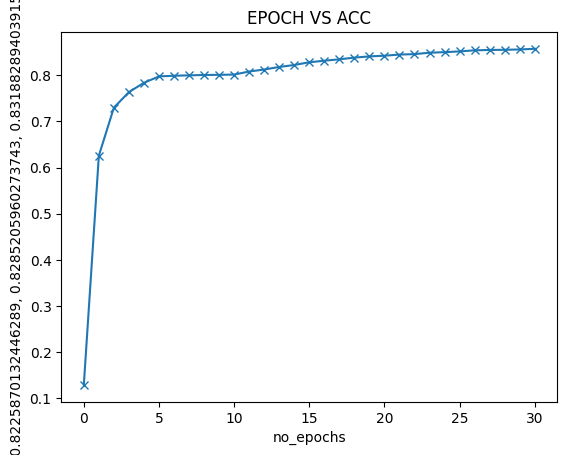

In [194]:
history = [result0] + history1+history2+history3+history4
accuracy = [result['val_acc'] for result in history]
plt.plot(accuracy,'x-')
plt.xlabel("no_epochs")
plt.ylabel(accuracy)
plt.title("EPOCH VS ACC")


In [195]:
test_dataset =  MNIST(root="D:\Learning\ML\RL\TORCH\mnist_data" , download=False , transform= transforms.ToTensor())


In [196]:
def predict(img , model):
    xb = img.unsqueeze(0)
    out = model(xb)
    confidence , preds = torch.max(out, dim=1)
    return preds[0].item(),confidence[0].item()

torch.Size([1, 28, 28]) 1


(1, 4.283860206604004)

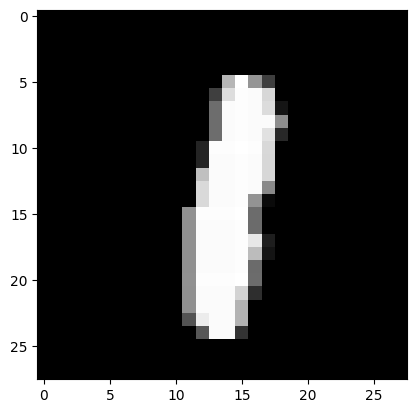

In [197]:
image_tensor , label  = test_dataset[1839]
print(image_tensor.shape ,label)
plt.imshow(image_tensor.reshape(28,28) , cmap="gray")
predict(image_tensor.reshape(28,28), model)

torch.Size([1, 28, 28]) 6


(6, 4.947579383850098)

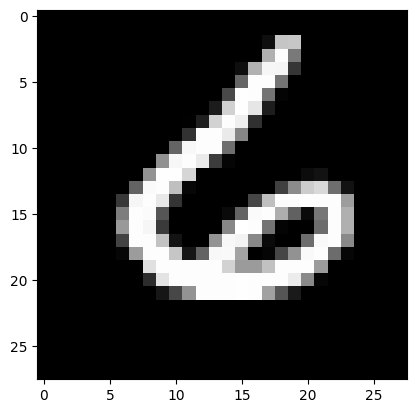

In [198]:
image_tensor , label  = test_dataset[9765]
print(image_tensor.shape ,label )
plt.imshow(image_tensor.reshape(28,28) , cmap="gray")
predict(image_tensor.reshape(28,28), model)

In [202]:
test_loader =  DataLoader(test_dataset , batch_size=128)
result = evaluate(model , test_loader)
result

{'val_loss': 0.6118780374526978, 'val_acc': 0.8595082759857178}

In [203]:
torch.save(model.state_dict(), "mnist-logistic.pth")

In [208]:
model2 = MnistModel()
evaluate(model2,test_loader)

{'val_loss': 2.3255608081817627, 'val_acc': 0.08930236846208572}

In [209]:
model2.load_state_dict(torch.load("mnist-logistic.pth"))
evaluate(model2,test_loader)

{'val_loss': 0.6118780374526978, 'val_acc': 0.8595082759857178}